In [1]:
import obspy
import obspy.taup
from obspy.taup.tau_model import TauModel
from obspy.taup.taup_create import build_taup_model

In [2]:
#build_taup_model("models_nd_format/Gudkova.nd")

In [3]:
#build_taup_model("models_nd_format/TAYAK.nd")

In [4]:
#build_taup_model("models_nd_format/DWAK.nd")
#build_taup_model("models_nd_format/EH45Tcold.nd")
#build_taup_model("models_nd_format/EH45TcoldCrust1b.nd")
#build_taup_model("models_nd_format/LFAK.nd")
#build_taup_model("models_nd_format/MAAK.nd")

In [5]:
# build_taup_model("models_nd_format/DWThot.nd")
# build_taup_model("models_nd_format/DWThotCrust1.nd")
# build_taup_model("models_nd_format/DWThotCrust1b.nd")
# build_taup_model("models_nd_format/EH45TcoldCrust1.nd")
# build_taup_model("models_nd_format/EH45ThotCrust2.nd")
# build_taup_model("models_nd_format/EH45ThotCrust2b.nd")
build_taup_model("models_nd_format/SANAK.nd")

Building obspy.taup model for 'models_nd_format/SANAK.nd' ...


In [6]:
from obspy.taup import TauPyModel
Gudkova = TauPyModel(model="Gudkova")
TAYAK = TauPyModel(model='TAYAK')
DWAK = TauPyModel(model='DWAK')
cold = TauPyModel(model='EH45Tcold')
crust1b = TauPyModel(model='EH45TcoldCrust1b')
LFAK = TauPyModel(model='LFAK')
MAAK = TauPyModel(model='MAAK')

In [8]:
model = Gudkova

In [9]:
arrivals = model.get_travel_times(source_depth_in_km=25,
                                  distance_in_degree=67, phase_list=['P', 'S'])
P_arrival_Gud = arrivals[0]
S_arrival_Gud = arrivals[3]
print(arrivals)
print(P_arrival_Gud.time, P_arrival_Gud.ray_param)
print(S_arrival_Gud.time, S_arrival_Gud.ray_param)

6 arrivals
	P phase arrival at 475.053 seconds
	P phase arrival at 482.609 seconds
	P phase arrival at 482.952 seconds
	S phase arrival at 863.958 seconds
	S phase arrival at 885.935 seconds
	S phase arrival at 887.110 seconds
475.052670696 311.88689533
863.957874403 602.210365678


In [10]:
import numpy as np
arrivals = TAYAK.get_travel_times(source_depth_in_km=25, distance_in_degree=67, phase_list=['P', 'S'])
P_arrival_TAYAK = arrivals[0]
S_arrival_TAYAK = arrivals[3]
#arcsin(P_vel / radius) * ray_param
exit_angle = np.degrees(np.arcsin((7.13/3389.5)*P_arrival_Gud.ray_param))
exit_angle2 = np.degrees(np.arcsin((5.84/3389.5)*P_arrival_TAYAK.ray_param))
print(exit_angle, P_arrival_Gud.incident_angle)
print(exit_angle2, P_arrival_TAYAK.incident_angle)

41.0009291817 1.3972465382
32.9406918876 20.0254039376


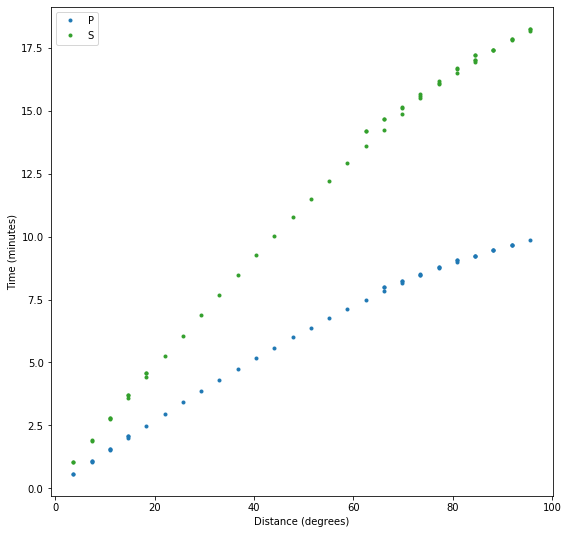

In [11]:
from obspy.taup import plot_travel_times
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9, 9))
ax = plot_travel_times(source_depth=25, phase_list=["P", "S"], model='Gudkova',
                       ax=ax, fig=fig)
ax.grid(which='both')
ax.set_title('Time Travel Plot for Gudkova Model')

fig.savefig('timetravel.png', transparent=True)

<IPython.core.display.Javascript object>


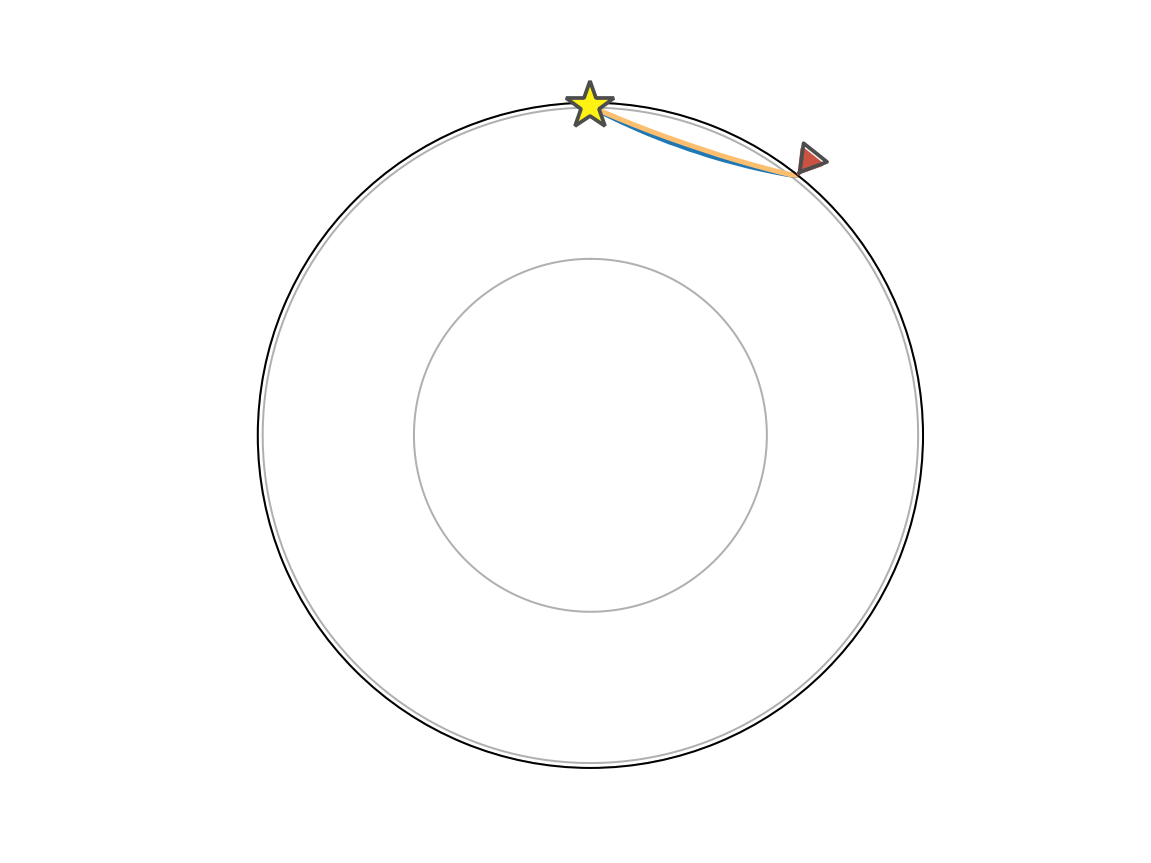

In [15]:
%matplotlib notebook
arrivals = Gudkova.get_ray_paths(
    source_depth_in_km=35, distance_in_degree=38.5, phase_list=["P", "S"])
ax = arrivals.plot_rays()

fig.savefig('gudkova_rays.png', transparent=True)

In [ ]:
%matplotlib notebook
arrivals = TAYAK.get_ray_paths(
    source_depth_in_km=25, distance_in_degree=67, phase_list=["P", "S"])
ax = arrivals.plot_rays()

In [ ]:
%matplotlib notebook
arrivals = DWAK.get_ray_paths(
    source_depth_in_km=25, distance_in_degree=67, phase_list=["P", "S"])
ax = arrivals.plot_rays()

In [ ]:
%matplotlib notebook
arrivals = cold.get_ray_paths(
    source_depth_in_km=25, distance_in_degree=67, phase_list=["P", "S"])
ax = arrivals.plot_rays()

In [ ]:
%matplotlib notebook
arrivals = crust1b.get_ray_paths(
    source_depth_in_km=25, distance_in_degree=67, phase_list=["P", "S"])
ax = arrivals.plot_rays()

In [ ]:
%matplotlib notebook
arrivals = LFAK.get_ray_paths(
    source_depth_in_km=25, distance_in_degree=67, phase_list=["P", "S"])
ax = arrivals.plot_rays()

In [ ]:
%matplotlib notebook
arrivals = MAAK.get_ray_paths(
    source_depth_in_km=25, distance_in_degree=67, phase_list=["P", "S"])
ax = arrivals.plot_rays()